# Supervised Learning
This notebook trains various supervised learning classification models including Logistic Regression, Decision Trees, Random Forest and SVM, to predict heart disease.

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## 2. Loading the feature selected dataset

In [2]:
df = pd.read_csv("../data/selected_feature_heart_disease.csv")

X = df.drop("target", axis=1)
y = df["target"]

## 3. Splitting the data into training and testing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 4. Helper function for evaluating models

In [4]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"=== {name} Evaluation ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_proba))
    print()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.2f})")

    return model

## 5. Training and evaluating models

=== Logistic Regression Evaluation ===
Accuracy: 0.85
Precision: 0.9130434782608695
Recall: 0.75
F1 Score: 0.8235294117647058
AUC Score: 0.9609375

=== Decision Tree Evaluation ===
Accuracy: 0.7333333333333333
Precision: 0.7727272727272727
Recall: 0.6071428571428571
F1 Score: 0.68
AUC Score: 0.7393973214285714

=== Random Forest Evaluation ===
Accuracy: 0.7333333333333333
Precision: 0.7307692307692307
Recall: 0.6785714285714286
F1 Score: 0.7037037037037037
AUC Score: 0.8515625

=== SVM Evaluation ===
Accuracy: 0.8333333333333334
Precision: 0.9090909090909091
Recall: 0.7142857142857143
F1 Score: 0.8
AUC Score: 0.9486607142857143



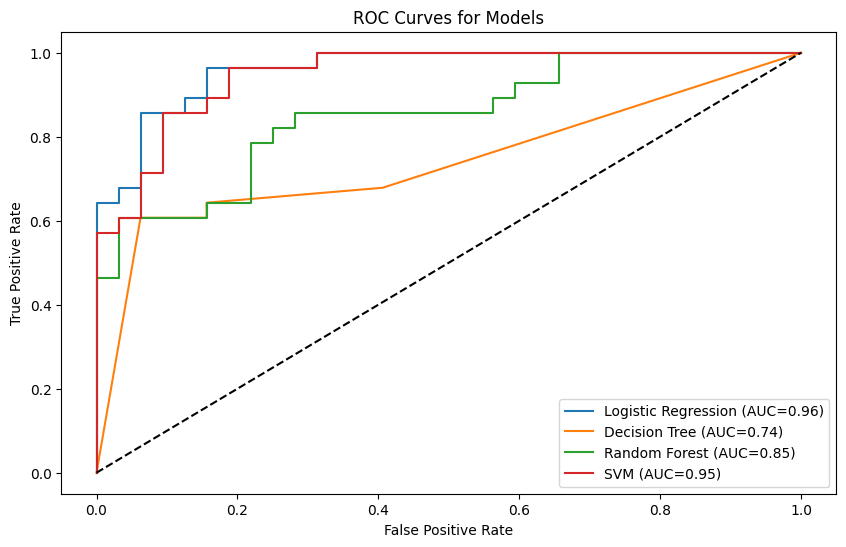

In [5]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

plt.figure(figsize=(10, 6))

trained_models = {}
for name, clf in models.items():
    trained_models[name] = evaluate_model(name, clf, X_train, X_test, y_train, y_test)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.show()